#########################################################
# Predicting Gender Using Dental Metrics
#########################################################

#### ================================================
### 📌 Step 1: Problem Definition
### ================================================


Objective:
The goal of this project is to analyze a dataset containing various dental measurements 
and use them to build a machine learning model that can predict the gender (Male/Female) 
of a person based on dental features.

Dataset Overview:
- The dataset consists of 1,100 records.
- It includes various dental measurements, such as intercanine distance, canine width, 
and canine index values.
- The target variable is "Gender", which we will convert into numerical values for model building.


#### ==========================
#### Step 2: Import Libraries
#### ==========================

In [1]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced visualization
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import LabelEncoder, Normalizer  # Encoding & Normalization
from sklearn.linear_model import LogisticRegression  # Machine Learning Model
from sklearn.tree import DecisionTreeClassifier  # Machine Learning Model
from sklearn.ensemble import RandomForestClassifier  # Machine Learning Model
from xgboost import XGBClassifier  # Machine Learning Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc  # Model evaluation

#### Set Seaborn style

In [2]:
sns.set(style="whitegrid")

### ================================================
### 📌 Step 3: Load Dataset
### ================================================

In [3]:
df = pd.read_csv("C:/Users/91885/Desktop/Eduonix/16301843/Dentistry Dataset.csv")

#### Display first few rows

In [4]:
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


#### Check basic dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [6]:
df.count()

Sl No                              1100
Sample ID                             0
Age                                1100
Gender                             1100
inter canine distance intraoral    1100
intercanine distance casts         1100
right canine width intraoral       1100
right canine width casts           1100
left canine width intraoral        1100
left canine width casts            1100
right canine index intra oral      1100
right canine index casts           1100
left canine index intraoral        1100
left canine index casts            1100
dtype: int64

### ================================================
### 📌 Step 4: Data Preprocessing
### ================================================

"""
This step involves handling missing values, encoding categorical variables, and
normalizing numerical features.
"""

#### Check for missing values

In [7]:
df.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

#### Drop the 'Sample ID' column as it contains only NaN values

In [8]:
df.drop(columns=['Sample ID'], inplace=True)

In [9]:
df.count()

Sl No                              1100
Age                                1100
Gender                             1100
inter canine distance intraoral    1100
intercanine distance casts         1100
right canine width intraoral       1100
right canine width casts           1100
left canine width intraoral        1100
left canine width casts            1100
right canine index intra oral      1100
right canine index casts           1100
left canine index intraoral        1100
left canine index casts            1100
dtype: int64

#### Encode the 'Gender' column (Male=1, Female=0)

In [10]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [11]:
df

,Sl No,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,24,1,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,22,1,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,25,1,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,21,1,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


#### Split Independent (X) and Dependent (Y) Variables

In [12]:
X = df.drop(columns=['Sl No', 'Gender'])  # Features
y = df['Gender']  # Target Variable

In [13]:
print(X)
print(y)

      Age  inter canine distance intraoral  intercanine distance casts  \
0      24                            25.06                       25.05   
1      22                            25.78                       25.79   
2      23                            23.83                       23.83   
3      20                            26.12                       26.12   
4      20                            26.36                       26.41   
...   ...                              ...                         ...   
1095   24                            24.29                       24.29   
1096   22                            25.22                       25.22   
1097   25                            24.24                       24.24   
1098   21                            24.87                       24.87   
1099   23                            24.51                       24.51   

      right canine width intraoral  right canine width casts  \
0                             6.08             

#### Normalize the X variable to scale values

In [14]:
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

In [15]:
X

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...
1095,24,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


### ================================================
### 📌 Step 5: Exploratory Data Analysis (EDA)
### ================================================

"""
EDA involves analyzing feature distributions and understanding correlations.
"""

#### Visualizing feature distributions

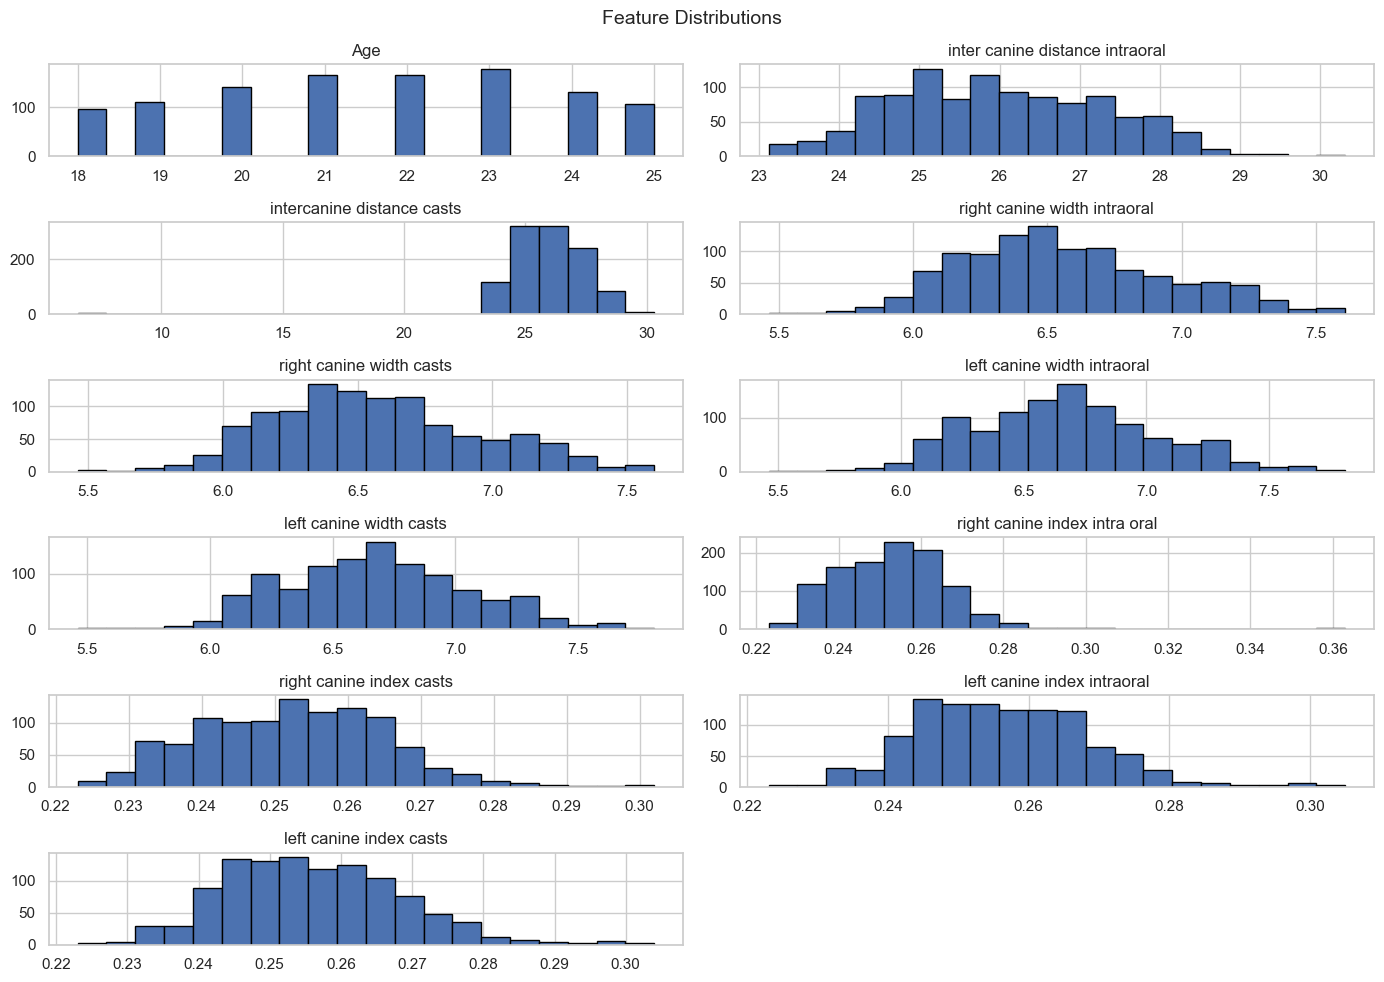

In [16]:
# Create the DataFrame with feature names
X_df = pd.DataFrame(X, columns=df.drop(columns=['Sl No', 'Gender']).columns)

# Plot histograms with 2 graphs per row
X_df.hist(figsize=(14, 10), bins=20, edgecolor='black', layout=(len(X_df.columns) // 2 + 1, 2))

# Set the title
plt.suptitle("Feature Distributions", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


#### Correlation Heatmap

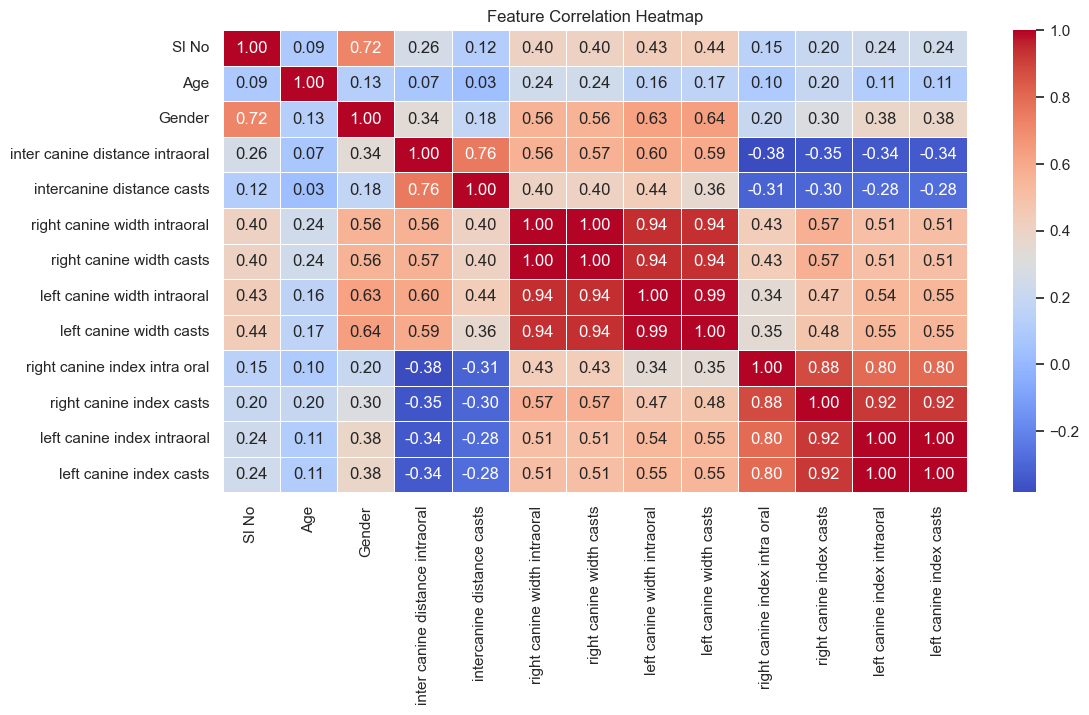

In [17]:
plt.figure(figsize=(12, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### ================================================
### 📌 Step 6: Model Building
### ================================================

"""
In this step, we train multiple machine learning models to predict gender.
"""

##### Splitting data into training (80%) and testing (20%) sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

### Define and train models

In [19]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

### Train each model and store results

In [20]:
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.68
Decision Tree Accuracy: 0.87
Random Forest Accuracy: 0.90
XGBoost Accuracy: 0.89


C:\Users\91885\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:21:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### ================================================
### 📌 Step 7: Model Evaluation
### ================================================

"""
We evaluate model performance using accuracy, confusion matrix, and ROC curves.
"""

#####  Choose the best model based on accuracy

In [21]:
best_model_name = max(model_results, key=model_results.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name} with Accuracy: {model_results[best_model_name]:.2f}")

Best Model: Random Forest with Accuracy: 0.90


##### Generate Confusion Matrix & Classification Report

In [22]:
y_pred_best = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       110
           1       0.89      0.91      0.90       110

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



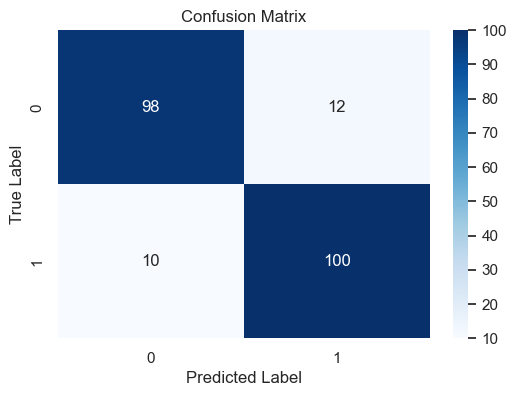

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##### Plot ROC Curve & Compute AUC

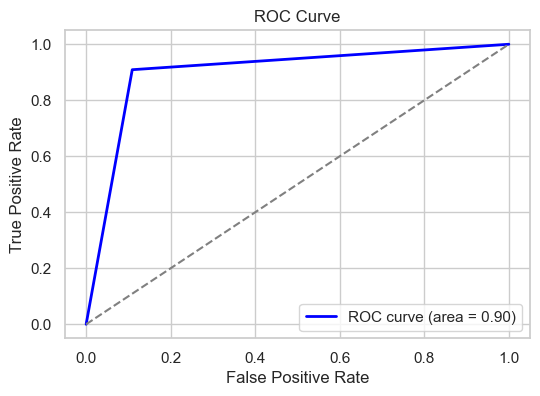

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()